<a href="https://colab.research.google.com/github/duartemoura/mastersprojects/blob/main/BB_ECG_Signal_Processing_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 1: ECG Signal Processing, part 2
Version: 20230919

Course: Biosignals & Bioimagers

Year: 2024-2024

Universidad Carlos III de Madrid

Gonzalo R. Ríos Muñoz grios@ing.uc3m.es



---


## Student: Duarte Moura

#**OBJECTIVES**

Students will gain proficiency in analyzing electrocardiograms (ECGs) through hands-on experience and the acquisition of essential signal recognition skills.

#**THEORY**

Your heart begins in a polarized state at rest, primarily because of the surplus of sodium ions (Na+) outside the cell membrane. This state is associated with a resting potential of approximately -90 mV. When the muscles are stimulated, the permeability of the cell membrane to sodium ions increases. This influx of sodium ions into the membrane alters the electrical field surrounding the muscle cells, triggering an action potential and initiating heart contraction. Additionally, other ions like potassium, calcium, and chloride play crucial roles in this process.

Electrodes placed on the skin's surface capture a summation of these action potentials. This resulting signal can be graphed as an electrocardiogram (ECG), illustrating the cardiac electrical potential. Different deflections in the ECG waveforms correspond to contractions in various regions of the heart. Each cardiac cycle is represented by distinct components: the P wave signifies atrial depolarization, the QRS complex signifies ventricular depolarization (atrial repolarization also takes place during this period), and the T wave represents ventricular repolarization.

For a visual representation of a typical ECG signal and the typical time intervals associated with each deflection, please refer to Figure 1 below.

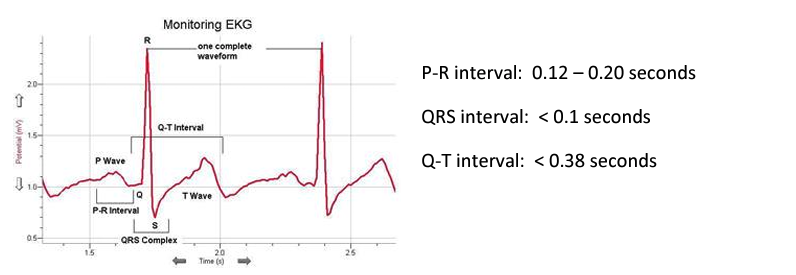

#**ECG FEATURE EXTRACTION**


*   Implement an algorithm to detect the P, QRS, and T peaks found on the ECG signal.   
*   Use the files: ECG1.txt and ECG2.txt
*   Elemento de lista
*   Elemento de lista

There is not a unique method for implementing this algorithm. The simplest approach involves setting an amplitude threshold for each wave. However, more versatile and sophisticated methods encompass QRS detection using variations of the Pan and Tompkins algorithm, locating local maxima, applying filters, leveraging frequency content information, and considering duration (or time over threshold) and time of occurrence.

It's essential to bear in mind that no algorithm is flawless. In our case, we will employ a straightforward threshold detection algorithm.

For P and T wave detection, you are encouraged to draw upon your existing knowledge and explore relevant sources such as books and research papers, for instance, 'Real-time P and T wave detection from ECG using FPGA' by Chatterjee et al.

With the results obtained from the preceding algorithm, you should be able to extract the following data from your signal:

*   **Heartbeat rhythm** in beats per minute (bpm).
*   Mean distance between **P-QRS peaks** (ms).
*   Mean distance between **QRS-T peaks** (ms).
*   Mean distance between **T-P peaks** (ms).
*   **Find irregular heartbeats**, considering as such those in which any of the aforementioned distances differs but a considerable amount from the mean.



# 00 - Notebook setups, files and libraries

In [10]:
#@title Mount Google Drive

from google.colab import drive
drive.mount("/content/drive") # Don't change this.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#@title Import Libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#@title Files and Folder Paths
# FILE/FOLDER PATHS
my_path = "Mestrado/BioSignals/Lab1-ECG/PT2" # Your path to Google Drive
gdrive_path = "/content/drive" + "/My Drive/" + my_path
os.chdir(gdrive_path)

# To check the current path
!pwd
!ls

/content/drive/My Drive/Mestrado/BioSignals/Lab1-ECG/PT2
BB_ECG_Signal_Processing_Practice.ipynb  ECG1.txt  ECG2.txt


# 01 - Load and visualize the ECG data

There are **two ECG** files with unknown rhythms. You will be asked to provide an **ECG interpretation** for both files:
*   ECG1.txt
*   ECG2.txt

Extract them in the same folder where this notebook is located. Change the gdrive_path variable accordingly.


In [13]:
# SIGNAL VARIABLES AND FUNCTIONS
fs = 1000 # Sampling frequency
ecg_lead_names = ['I', 'II', 'III',  'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

def load_ECG(ecg_file_path, fs, verbose=False):
  # SECTION 01 - LOAD ECG SIGNAL
  if verbose:
    aux_print = '- Loading ECG file: ' + ecg_file_path + ' (fs=' + str(fs) + ' Hz).'
    print(aux_print)

  # Read .txt file with pandas
  pd_table = pd.read_table(ecg_file_path, decimal=',', delimiter=' ')
  # Remove last column (import padding)
  ecg = pd_table.to_numpy() # L x 13
  ecg = ecg[:,:12] # Remove column

  [L,num_ecg_leads] = ecg.shape

  if verbose:
    aux_print = '- ECG file loaded: ' + str(num_ecg_leads) + ' leads, ' + str(L) + ' samples.'
    print(aux_print)

  return ecg

In [14]:
#@title TO DO: load ECG1.txt and ECG2.txt files. Use the first 60 seconds of the signals only!

ecg1_file = "ECG1.txt"
ecg1_file_path = gdrive_path + '/' + ecg1_file
ecg2_file = "ECG2.txt"
ecg2_file_path = gdrive_path + '/' + ecg2_file

ecg1 = load_ECG(ecg1_file_path, fs, verbose=True)
ecg2 = load_ECG(ecg2_file_path, fs, verbose=True)

# Get the first 60 seconds of the signals only
seconds = 60

num_samples = seconds*fs # samples

ecg1 = ecg1[:num_samples,:]
ecg2 = ecg2[:num_samples,:]

# GET ECG DIMENSIONS
# QUESTIONS:
# - How many samples?
# - How many channels?
# - What is the ECG duration in seconds before the 60 seconds clipping?
[L,num_ecg_leads] = ecg1.shape
T = L/fs # seconds
aux_print = 'ECG1 & ECG2 INFORMATION:'
print(aux_print)
aux_print = '- Number of samples: ' + str(L) + ' samples'
print(aux_print)
aux_print = '- Number of channels: ' + str(num_ecg_leads) + ' leads'
print(aux_print)
aux_print = '- ECG duration (seconds): ' + str(T) + ' seconds'
print(aux_print)

- Loading ECG file: /content/drive/My Drive/Mestrado/BioSignals/Lab1-ECG/PT2/ECG1.txt (fs=1000 Hz).
- ECG file loaded: 12 leads, 63475 samples.
- Loading ECG file: /content/drive/My Drive/Mestrado/BioSignals/Lab1-ECG/PT2/ECG2.txt (fs=1000 Hz).
- ECG file loaded: 12 leads, 62499 samples.
ECG1 & ECG2 INFORMATION:
- Number of samples: 60000 samples
- Number of channels: 12 leads
- ECG duration (seconds): 60.0 seconds


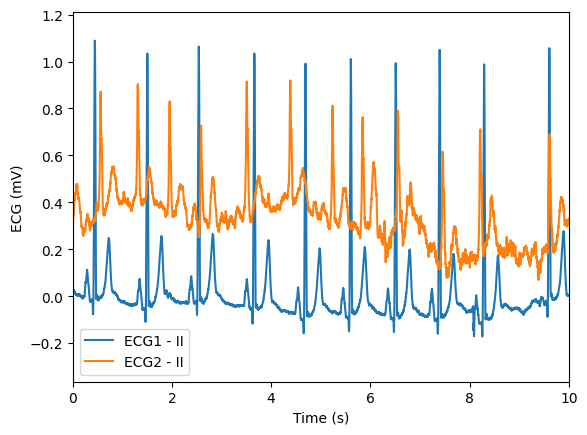

In [15]:
#@title TO DO: represent the first 30 seconds of the 2nd channel of the 2 ECG signal. The 2nd channel is the II-lead.
channel_index = 1
aux_channel_name = ecg_lead_names[channel_index]
t_init = 0
t_end = 10
time = np.arange(t_init, T, 1/fs)
plt.plot(time, ecg1[:,channel_index], label='ECG1 - '+aux_channel_name)
plt.plot(time, ecg2[:,channel_index], label='ECG2 - '+aux_channel_name)
plt.xlabel("Time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.legend()
plt.show()

##**QUESTION 1.1:** Describe the two signals. Are the signals alike? Would you use them immediately? (2-3 lines)

**ANSWER:** The signals are both recording of ECG but they are not alike. ECG1 has clear peaks and a normal baseline. Ecg2 seems to have a lot more noise and has a higher baseline as well. Both of the signals would need to be processed before using, but ECG2 would need more processing than 1.  

Text(0.5, 0, 'Time (s)')

<Figure size 640x480 with 0 Axes>

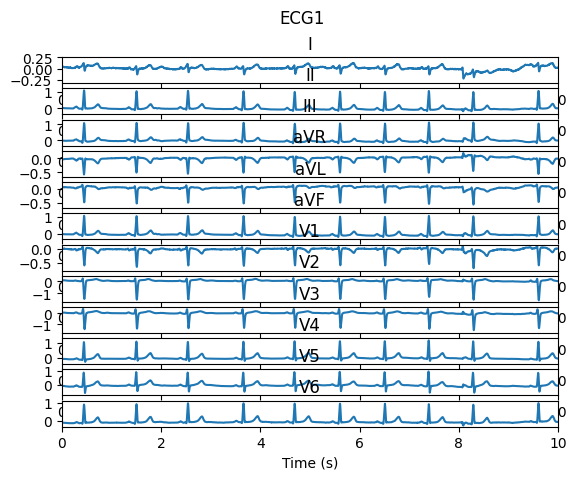

In [16]:
#@title TO DO: Now represent the first 10 seconds of the ECG1 signal to see all the leads.

# PLOT THE SIGNALS
t_init = 0
t_end = 10
plt.figure()
fig, axs = plt.subplots(num_ecg_leads)
fig.suptitle('ECG1')
for i in range(num_ecg_leads):
  aux_ecg = ecg1[:,i]
  axs[i].plot(time, aux_ecg)
  axs[i].set_xlim([t_init, t_end])
  aux_title = ecg_lead_names[i]
  axs[i].set_title(aux_title)

plt.xlabel("Time (s)")

##**QUESTION 1.2:** What type of noise/artifacts/error do you see now? Describe them (2-3 lines)

**ANSWER:** There appears to be some baseline wandering which is most noticeable in signal I. It is also very noticeable the signal change around the 9 second mark, possibly an artifact due to electrode distrubance or patient movement.

# 02 - Remove signal noise
As you may have noticed the ECG signals include some undesired noise, before detecting any features, we should filter it out! Remember:

*   **Baseline wander** (low frequency noise).
*   **Power line interference** (50/60 Hz check it!).
*   **Muscle/background noise**.

In [17]:
#@title TO DO: Implement the three filters to remove the noise!
import numpy as np
from scipy import signal

def median_filter(data, window_size):

    filtered_data = np.zeros(len(data))

    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1) #check limits
        filtered_data[i] = np.median(data[start:end])

    return filtered_data

def baseline_filter(ecg, f_cutoff, fs, num_taps): #high pass

  taps = signal.firwin(num_taps, f_cutoff, fs=fs, pass_zero = False)

  ecg_baseline_removed = signal.lfilter(taps, 1, ecg)

  return ecg_baseline_removed

def notch_filter(ecg, f0, Q, fs):

  #f0: Frequency to be removed from signal (Hz)
  #Q: Quality factor
  # Design notch filter
  b, a = signal.iirnotch(f0, Q, fs)
  # Apply the notch filter
  ecg_notch = signal.filtfilt(b, a, ecg)

  return ecg_notch

In [18]:
#@title TO DO: Filter the ECG signal for all the leads.

ecg1_filtered = np.copy(ecg1) #allocate new memory for new variable
window_size = 5
f_cutoff = 0.5 # Baseline HPF
num_taps = 501 # Baseline
f0 = 50 # Notch filter
Q = 10 # Notch filter quality factor

for i in range(num_ecg_leads):
  aux_ecg = ecg1[:,i]
  aux_ecg = median_filter(aux_ecg, window_size=window_size)
  aux_ecg = baseline_filter(aux_ecg, f_cutoff=f_cutoff, fs=fs, num_taps=num_taps)
  aux_ecg = notch_filter(aux_ecg, f0=f0, Q=Q, fs=fs)
  ecg1_filtered[:,i] = aux_ecg

Text(0.5, 0, 'Time (s)')

<Figure size 640x480 with 0 Axes>

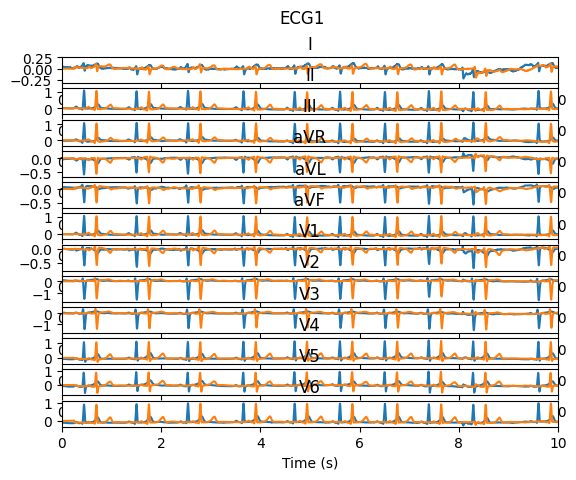

In [19]:
#@title TO DO: Now represent the first 10 seconds of the ECG1 signal before and after filtering for all the leads.

# PLOT THE SIGNALS
t_init = 0
t_end = 10
plt.figure()
fig, axs = plt.subplots(num_ecg_leads)
fig.suptitle('ECG1')
for i in range(num_ecg_leads):
  aux_ecg = ecg1[:,i]
  aux_ecg_filtered = ecg1_filtered[:,i]
  axs[i].plot(time, aux_ecg)
  axs[i].plot(time, aux_ecg_filtered)
  axs[i].set_xlim([t_init, t_end])
  aux_title = ecg_lead_names[i]
  axs[i].set_title(aux_title)

plt.xlabel("Time (s)")

To fight the delay I could ou use fillfit or instead flip the signal and run it through the filters again

# 03 - Calculate R-peak locations

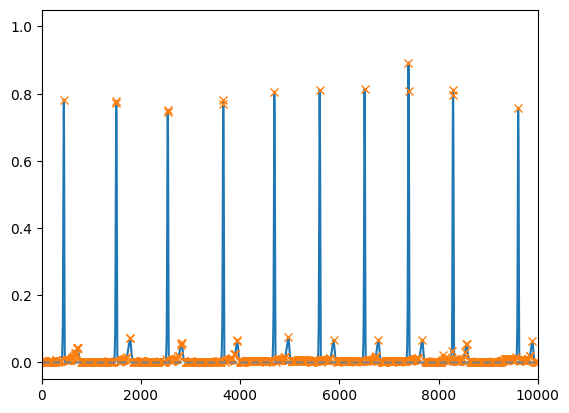

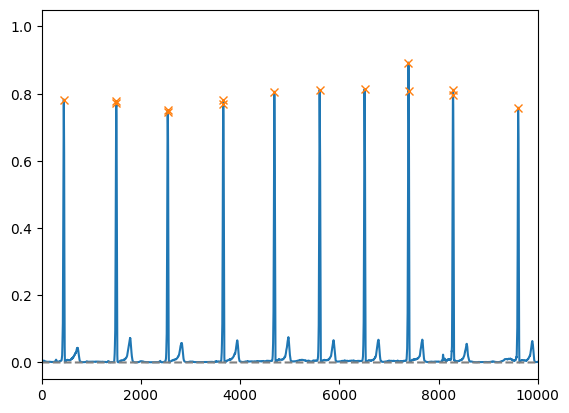

[1055    4 1034    3 1117    3 1028  914  905  885    5  892    4 1311
 1130  999 1000    3 1024    4  814  921  923  915    3 1293    3 1084
    3 1087  903 1048 1072    4 1112 1079    4 1011  896 1047    4 1089
 1005 1071    4  959    4 1063  879    4 1032 1118    4 1053    4 1056
    4  906    4 1084    3 1069 1119    4  519    5 1269  868  595 1326
 1218    3 1072  542 1355  534 1259 1175    5 1159    3 1007  917 1115]


In [20]:
# CALCULATE THE HEART BEAT IN BEATS PER SECOND
# - What do you propose?

#Easier to measure based on the peak in the QRS complex
# we can look at the highest first derivative

#normaly just get the second or V1 or v5 - better ones

# PEAK DETECTION
from scipy.signal import find_peaks
# PRE-PROCESS THE SIGNAL
# To better calculate the R, I calculate the maximum of each derivative, so I do it independently of choosing one or the other.
x = np.max(ecg1, axis=1) # Max for each time instant in all the derivations
x = x/np.max(x)
x = np.power(x,2) # Squaring is recommended for threshold detection
peaks, _ = find_peaks(x)
# PLOT THE RESULT
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlim([0, 10000])
plt.show()

# USE A THRESHOLD
ecg_threshold = 0.5
peaks_no_der, _ = find_peaks(x, height=ecg_threshold) #you can specify minimum amount of time between peaks with another argument
plt.plot(x)
plt.plot(peaks_no_der, x[peaks_no_der], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlim([0, 10000])
plt.show()
# PLOT THE RESULT

# CALCULATE DISTANCE BETWEEN PEAKS
peaks_diff = np.diff(peaks_no_der)
print(peaks_diff)

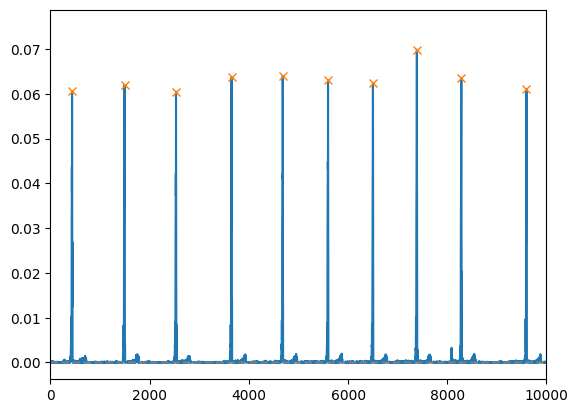

In [21]:
from re import X
# ALTERNATIVE METHOD BASED ON THE MAX SLOPE
# Calculate the 1st derivative

x_diff = np.diff(x) #diff function calculates the derivative
# We only need the positive deflections to detect the peaks

aux_not_valid = np.where(x_diff<0)[0]
x_diff[aux_not_valid] = 0
# Calculate the peaks
ecg_diff_threshold = 0.05
# Add a distance requirement!
peak_distance = 500 #max beats per minute with 500 = 120 beat per minute
r_peaks, _ = find_peaks(x_diff, height=ecg_diff_threshold, distance =peak_distance)
plt.plot(x_diff)
plt.plot(r_peaks, x_diff[r_peaks], "x")
plt.plot(np.zeros_like(x_diff), "--", color="gray")
plt.xlim([0, 10000])
plt.show()


# 04 - ECG FEATURES

You are asked to calculate:

*   **Heartbeat rhythm** in beats per minute (bpm).
*   Mean distance between **P-QRS peaks** (ms).
*   Mean distance between **QRS-T peaks** (ms).
*   Mean distance between **T-P peaks** (ms).
*   **Find irregular heartbeats**, considering as such those in which any of the aforementioned distances differs but a considerable amount from the mean.

You can use **ANY RESOURCE** available, but please comment the code.

For some features the P, Q, R, S, and T peak locations must be calculated, so feel free to implement any method that works.

In [22]:
#@title TO DO: Estimate the Heart Beat in bpm
# CALCULATE DISTANCE BETWEEN PEAKS
peaks_diff = np.diff(r_peaks)
mean_rr_interval = np.mean(peaks_diff)
mean_rr_interval_seconds =mean_rr_interval/fs
mean_rr_freq_hz = 1/mean_rr_interval_seconds
heart_beat = mean_rr_freq_hz*60

aux_print = 'Mean RR interval: ' + str(mean_rr_interval_seconds) + ' seconds.'
print(aux_print)
aux_print = 'Cycles per second: ' + str(mean_rr_freq_hz) + ' Hz.'
print(aux_print)
aux_print = 'Beats per minute: ' + str(heart_beat) + ' bpm.'
print(aux_print)


Mean RR interval: 1.0541607142857141 seconds.
Cycles per second: 0.948621957210374 Hz.
Beats per minute: 56.91731743262244 bpm.


In [23]:
#Define low pass filter because the p waves were barely visible

from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

cutoff_frequency = 10
x_filtered = butter_lowpass_filter(x, cutoff_frequency, fs)


In [24]:
# Find P-wave peaks
p_peaks = []

for r_peak in r_peaks:
  # Search for P-wave peak in the 200ms window before the R-peak
  p_search_start = max(0, r_peak - int(0.2 * fs))
  p_search_end = r_peak
  p_wave_segment = x_filtered[p_search_start:p_search_end]
  p_peak, _ = find_peaks(p_wave_segment)
  if p_peak.size > 0:
    p_peaks.append(p_search_start + p_peak[0])

p_peaks = np.array(p_peaks)


# Find T-wave peaks
t_peaks = []

for r_peak in r_peaks:
    # Search for T-wave peak in the 300ms window after the R-peak
    t_search_start = r_peak + int(0.2 * fs)
    t_search_end = min(len(x_filtered ), r_peak + int(0.6 * fs))
    t_wave_segment = x_filtered[t_search_start:t_search_end]
    t_peak, _ = find_peaks(t_wave_segment)
    if t_peak.size > 0:
        t_peaks.append(t_search_start + t_peak[0])

t_peaks = np.array(t_peaks)

In [25]:
print("p_peaks:",p_peaks,"\n")
print("r_peaks:",r_peaks,"\n")
print("t_peaks:",t_peaks,"\n")

p_peaks: [  319  1378  2416  3536  4567  5481  6386  7272  8170  9482 10610 11609
 12612 13639 14453 15379 16301 17216 18511 19598 20688 21592 22639 23713
 24827 25907 26922 27818 28865 29954 30959 32035 32996 34063 34943 35978
 37097 38154 39214 40124 41212 42281 43403 45197 46064 46661 47989 49207
 50282 50823 52177 53971 55145 56314 57319 58237 59352] 

r_peaks: [  435  1493  2531  3651  4682  5596  6501  7387  8283  9597 10724 11723
 12727 13754 14575 15493 16416 17332 18628 19715 20804 21707 22755 23827
 24942 26022 27037 27933 28980 30070 31075 32149 33113 34178 35058 36094
 37212 38270 39329 40239 41327 42395 43519 45312 46179 46778 48105 49322
 50398 50940 52295 54087 55264 56426 57436 58353 59468] 

t_peaks: [  710  1774  2812  3934  4965  5876  6781  7664  8560  9885 11002 12007
 13007 14025 14843 15770 16696 17607 18905 19993 21082 21984 23037 24111
 25229 26307 27317 28212 29265 30357 31364 32431 33390 34461 35336 36376
 37492 38549 39612 40523 41614 42682 43802 45598 46461

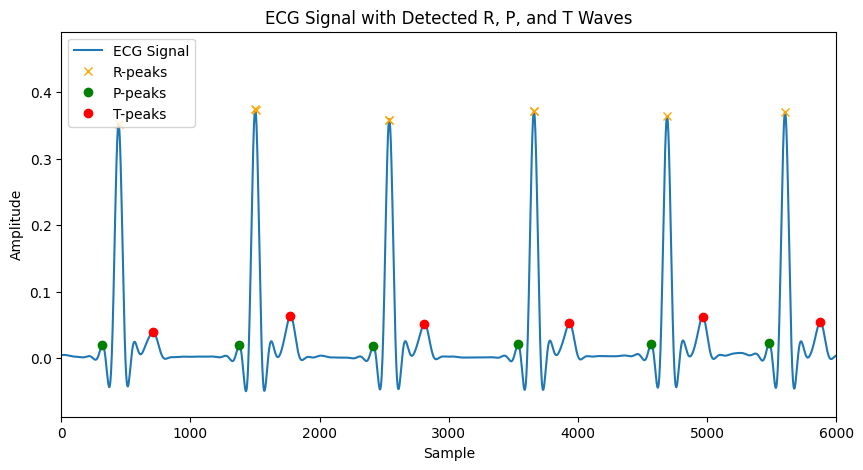

In [26]:
# Plot the ECG signal along with detected R, P, and T waves
plt.figure(figsize=(10, 5))
plt.plot(x_filtered, label='ECG Signal')
plt.plot(peaks_no_der, x_filtered[peaks_no_der], "x", label='R-peaks', color='orange')
plt.plot(p_peaks, x_filtered[p_peaks], "o", label='P-peaks', color='green')
plt.plot(t_peaks, x_filtered[t_peaks], "o", label='T-peaks', color='red')
plt.legend()
plt.xlim([0, 6000])
plt.title('ECG Signal with Detected R, P, and T Waves')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [27]:
p_peaks_diff = np.diff(p_peaks)
mean_pp_interval = np.mean(p_peaks_diff)
mean_pp_interval_seconds =mean_pp_interval/fs

print(mean_pp_interval_seconds)

t_peaks_diff = np.diff(t_peaks)
mean_tt_interval = np.mean(t_peaks_diff)
mean_tt_interval_seconds =mean_tt_interval/fs

print(mean_tt_interval_seconds)

1.0541607142857141
1.0543214285714286


In [28]:
#@title Mean distance in ms function

def mean_distance(peak_1, peak_2):
  peak_1_ms = peak_1 * 1000 / fs
  peak_2_ms = peak_2 * 1000 / fs
  distance = np.abs(peak_1 - peak_2)
  mean_distance = np.mean(distance)
  print("Mean distance:", mean_distance, "ms")

In [29]:
#@title TO DO: Mean distance between **P-QRS peaks** (ms)
# Mean distance between **P-QRS peaks** (ms)

distance1 = mean_distance(r_peaks, p_peaks)

Mean distance: 115.50877192982456 ms


In [30]:
#@title TO DO: Mean distance between **QRS-T peaks** (ms)
distance2 = mean_distance(t_peaks, r_peaks)

Mean distance: 280.63157894736844 ms


In [31]:
#@title TO DO: Mean distance between **T-P peaks** (ms)

distance3 = mean_distance(p_peaks, t_peaks)

Mean distance: 396.140350877193 ms


In [32]:
#@title TO DO: Find irregular heartbeats

peaks_diff = np.diff(r_peaks)
mean_rr_interval = np.mean(peaks_diff)

threshold = 0.25 * mean_rr_interval

# upper and lower bounds
upper_bound = mean_rr_interval + threshold
lower_bound = mean_rr_interval - threshold

# Identify irregular beats that are above the upper bound or below the lower bound
irregular_indices_up = np.where(peaks_diff > upper_bound)[0] + 1
irregular_indices_down = np.where(peaks_diff < lower_bound)[0] + 1

print("Irregular Heartbeats Up R peaks:", irregular_indices_up)
print("Irregular Heartbeats Down R peaks:", irregular_indices_down)

Irregular Heartbeats Up R peaks: [43 46 50 51]
Irregular Heartbeats Down R peaks: [45 49]


# 05 - ECG DIAGNOSIS

**QUESTION:** What rhythm do you identify in ECG1 and ECG2? Explain your answer and provide evidence.

**ANSWER:** Your answer goes here.